У нас есть данные аналитики платформы с билетами на события. Необходимо помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от платформы с июня 2017 по конец мая 2018 года:

    лог сервера с данными о посещениях сайта Яндекс.Афиши,
    выгрузка всех заказов за этот период,
    статистика рекламных расходов.

Необходимо выяснить:

    как люди пользуются продуктом,
    когда они начинают покупать,
    сколько денег приносит каждый клиент
    когда клиент окупается.

### Шаг 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
visits=pd.read_csv('/datasets/visits_log.csv')
orders=pd.read_csv('/datasets/orders_log.csv')
costs=pd.read_csv('/datasets/costs.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В столбцах End ts и Start ts можно использовать тип datetime.

In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


В столбце Buy Ts - установить тип datetime.

In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Приведем названия к нижнему регистру и уберем пробелы из названий столбцов.

In [9]:
visits.columns = [x.lower() for x in visits.columns]

In [10]:
visits=visits.rename(columns = {'end ts':'end_ts','start ts':'start_ts','source id':'source_id'})

In [11]:
orders.columns = [x.lower() for x in orders.columns]

In [12]:
orders=orders.rename(columns = {'buy ts':'buy_ts'})

Заменим типы данных.

In [13]:
visits['end_ts']=visits['end_ts'].astype('datetime64')
visits['start_ts']=visits['start_ts'].astype('datetime64')
orders['buy_ts']=orders['buy_ts'].astype('datetime64')

### Шаг 2

### Продукт

### Сколько людей пользуются в день, неделю, месяц?

In [14]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [16]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total=visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [17]:
print('DAU - {}\nWAU - {}\nMAU - {}'.format(int(dau_total),int(wau_total),int(mau_total)))

DAU - 907
WAU - 5716
MAU - 23228


In [18]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


### Сколько сессий в день?

In [19]:
visits.groupby('session_date')['uid'].count().mean()

987.3626373626373

В среднем в приложении проводят 987 сессий в день.

### Сколько длится одна сессия?

In [20]:
visits['session_duration_sec']=(visits['end_ts'] - visits['start_ts']).dt.seconds

In [21]:
visits['session_duration_sec'].mean()

643.506488592098

Средняя продолжительность сессии - 643.5 секунд.

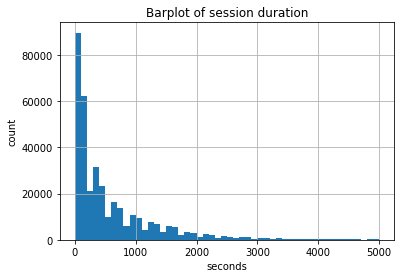

In [22]:
ax=visits['session_duration_sec'].hist(bins=50,range=(0,5000))
plt.title('Barplot of session duration', fontsize=12)
ax.set(xlabel='seconds', ylabel='count')
plt.show()

### Как часто люди возвращаются?

Рассчитаем Retention Rate.

In [23]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [24]:
visits['session_date'] = pd.to_datetime(visits['session_date'])

In [25]:
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')

In [26]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = ((visits['activity_month'] - visits['first_activity_month'])/ (np.timedelta64(1,'M'))).round()

In [27]:
visits['cohort_lifetime']=visits['cohort_lifetime'].astype(int).round()

In [28]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [29]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [30]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

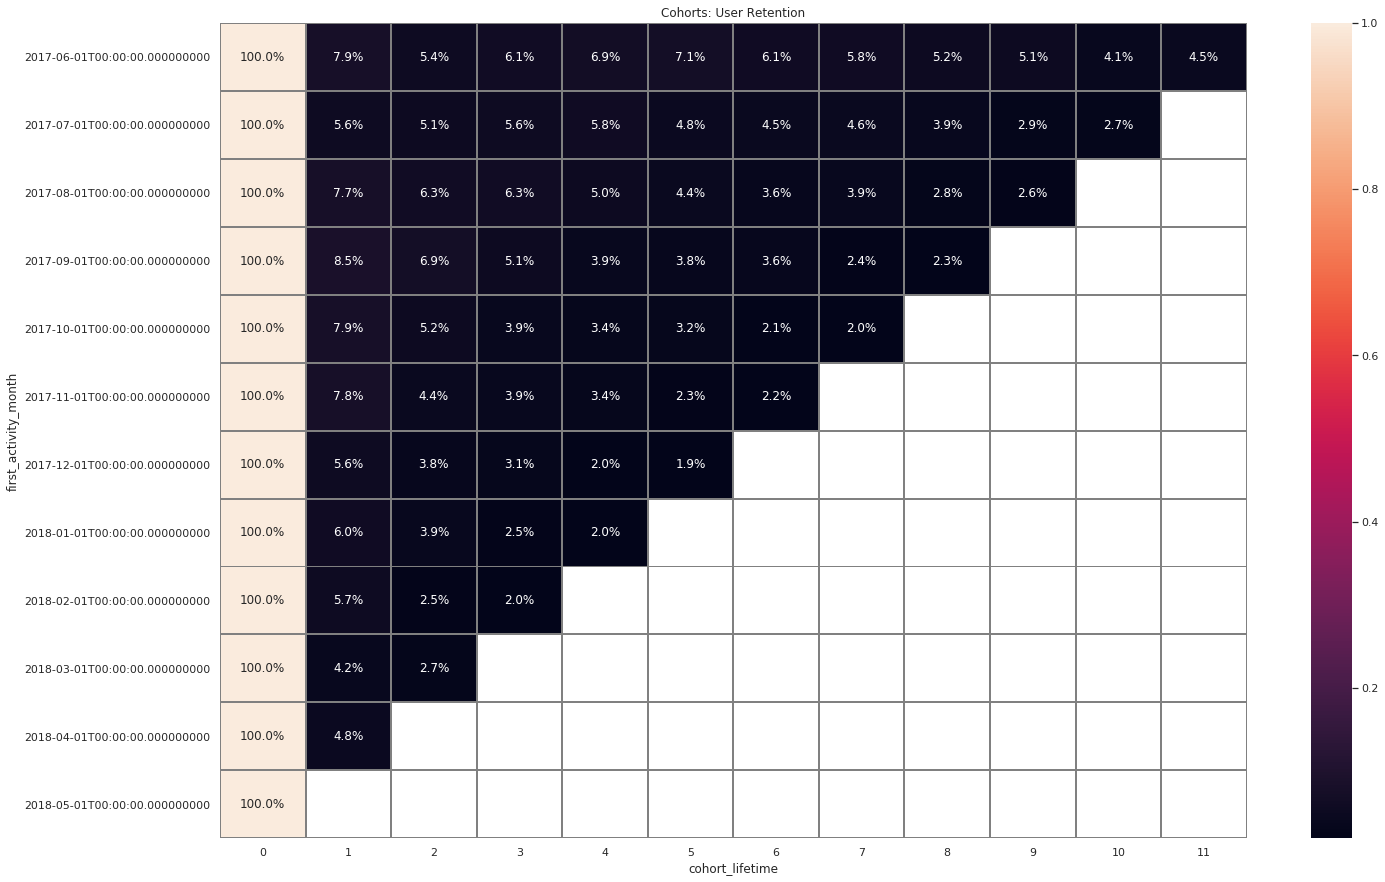

In [31]:
sns.set(style='white')
plt.figure(figsize=(23, 15))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');


### Продажи

Когда люди начинают покупать?

In [32]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [33]:
#orders['buy_year']  = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
#orders['buy_week']  = orders['buy_ts'].dt.week
orders['buy_date'] = orders['buy_ts'].dt.date

In [34]:
orders['buy_day'] = orders['buy_ts'].dt.weekday

In [35]:
orders.groupby(['buy_month'])['revenue'].mean()

buy_month
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
2018-06-01    3.420000
Name: revenue, dtype: float64

In [36]:
orders.groupby(['buy_day'])['revenue'].mean()

buy_day
0    4.960603
1    4.900476
2    4.953106
3    5.294640
4    4.823605
5    4.540310
6    5.557334
Name: revenue, dtype: float64

In [37]:
first_purchase=orders.groupby('uid')['buy_date'].min()

buy_and_first=pd.merge(first_purchase,visits[['uid','first_activity_date']],on='uid')

buy_and_first['buy_date']=buy_and_first['buy_date'].astype('datetime64')

buy_and_first.head()

,uid,buy_date,first_activity_date
0,313578113262317,2018-01-03,2017-09-18
1,313578113262317,2018-01-03,2017-09-18
2,313578113262317,2018-01-03,2017-09-18
3,1575281904278712,2017-06-03,2017-06-03
4,1575281904278712,2017-06-03,2017-06-03


In [38]:
durations_before_purchase=(buy_and_first['buy_date']-buy_and_first['first_activity_date'])/np.timedelta64(1, 'D')

In [39]:
durations_before_purchase

0        107.0
1        107.0
2        107.0
3          0.0
4          0.0
         ...  
97389    103.0
97390    103.0
97391    103.0
97392      0.0
97393      0.0
Length: 97394, dtype: float64

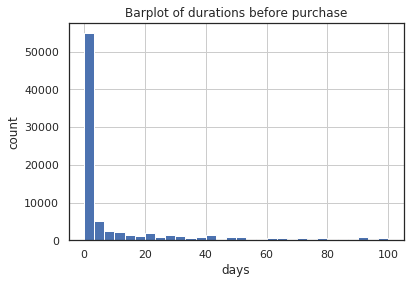

In [40]:
ax=durations_before_purchase.hist(bins=30,range=(0,100))
plt.title('Barplot of durations before purchase', fontsize=12)
ax.set(xlabel='days', ylabel='count')
plt.show()

In [41]:
durations_before_purchase.mean()

33.71375033369612

В среднем перед первой сессией и первой покупкой проходит 33 дня.

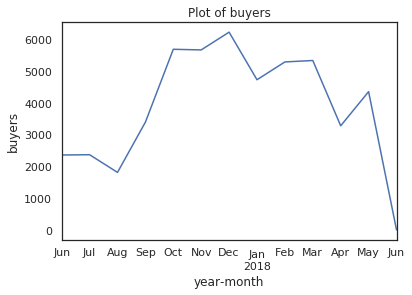

In [42]:
ax=orders.groupby(['buy_month'])['uid'].count().plot()
plt.title('Plot of buyers', fontsize=12)
ax.set(xlabel='year-month', ylabel='buyers')
plt.show()

На графике динамика покупок по месяцам. Заметен двухкратный рост от года к году.

<br>Большинство пользователей совершают первую покупку в первый же визит.

Сколько раз покупают за период?

In [43]:
orders.groupby(['buy_month','uid'])['uid'].count().mean()

1.2290645798288597

За период в среднем пользователь совершает 1.2 покупки.

Какой средний чек?

In [44]:
orders.groupby('uid')['revenue'].mean().mean()

4.093092887696445

Средняя выручка с заказа - 4.09 единиц.



Расчитаем LTV.

In [45]:
orders.head()

,buy_ts,revenue,uid,buy_month,buy_date,buy_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,3
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,3
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,3
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,3
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


In [46]:
first_orders = orders.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [47]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [48]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,buy_month,buy_date,buy_day,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,3,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,3,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,3,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,3,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,2017-06-01


In [49]:
cohorts = orders_new.groupby(['first_order_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [50]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [51]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,buy_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [52]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round()
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,5.0,0,0,1,1,1,1,1,1,1,1,0
2017-07-01,6.0,0,1,0,0,0,0,0,0,0,0,
2017-08-01,5.0,0,0,0,0,0,0,0,0,0,,
2017-09-01,6.0,1,1,4,0,1,1,0,0,,,
2017-10-01,5.0,1,0,0,0,0,0,0,,,,
2017-11-01,5.0,0,0,0,0,0,0,,,,,
2017-12-01,5.0,0,1,1,0,0,,,,,,
2018-01-01,4.0,0,0,0,0,,,,,,,
2018-02-01,4.0,0,0,0,,,,,,,,


In [53]:
indexes=[]
ltvs=[]
for index in output.index:
    print('В когорте ',index,'LTV составила ',output.loc[index].sum())
    indexes.append(index)
    ltvs.append(output.loc[index].sum())

В когорте  2017-06-01 00:00:00 LTV составила  13.0
В когорте  2017-07-01 00:00:00 LTV составила  7.0
В когорте  2017-08-01 00:00:00 LTV составила  5.0
В когорте  2017-09-01 00:00:00 LTV составила  14.0
В когорте  2017-10-01 00:00:00 LTV составила  6.0
В когорте  2017-11-01 00:00:00 LTV составила  5.0
В когорте  2017-12-01 00:00:00 LTV составила  7.0
В когорте  2018-01-01 00:00:00 LTV составила  4.0
В когорте  2018-02-01 00:00:00 LTV составила  4.0
В когорте  2018-03-01 00:00:00 LTV составила  5.0
В когорте  2018-04-01 00:00:00 LTV составила  6.0
В когорте  2018-05-01 00:00:00 LTV составила  5.0
В когорте  2018-06-01 00:00:00 LTV составила  3.0


In [54]:
ltvs

[13.0, 7.0, 5.0, 14.0, 6.0, 5.0, 7.0, 4.0, 4.0, 5.0, 6.0, 5.0, 3.0]

In [55]:
ltv_cohorts=pd.DataFrame({'cohort':indexes,'ltv':ltvs})

In [56]:
ltv_cohorts

,cohort,ltv
0,2017-06-01,13.0
1,2017-07-01,7.0
2,2017-08-01,5.0
3,2017-09-01,14.0
4,2017-10-01,6.0
5,2017-11-01,5.0
6,2017-12-01,7.0
7,2018-01-01,4.0
8,2018-02-01,4.0
9,2018-03-01,5.0


### Маркетинг

<font color='blue'> Весь маркетинговый анализ надо проводить в разрезе рекламных источников, ведь гланая цель - определить прибыльные\убыточные источники. </font>

Сколько денег потратили? Всего / на каждый источник / по времени

In [57]:
costs['costs'].sum()

329131.62

Всего потратили 329131.62

In [58]:
costs.pivot_table(index='source_id',values='costs',aggfunc=['sum','mean']).sort_values(by=('mean','costs'))

,sum,mean
,costs,costs
source_id,,
9,5517.49,15.199697
10,5822.49,16.039917
1,20833.27,57.391928
2,42806.04,117.922975
5,51757.10,142.189835
4,61073.60,168.246832
3,141321.63,389.315785


Траты по источникам.

In [59]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

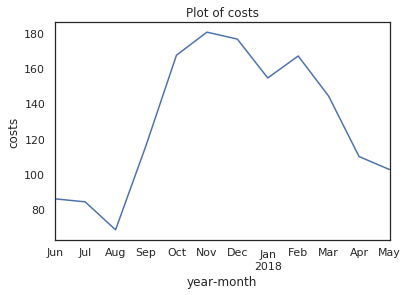

In [60]:
ax=costs.groupby('cost_month')['costs'].mean().plot()
plt.title('Plot of costs', fontsize=12)
ax.set(xlabel='year-month', ylabel='costs')
plt.show()

Траты по времени

Посчитаем CAC и ROI.

#### Return on marketing investment по месячным когортам.

In [61]:
report=pd.merge(report, costs, left_on='first_order_month', right_on='cost_month')


In [62]:
costs_=costs.groupby(['cost_month'])['costs'].sum()

In [63]:
report_new=report.pivot_table(index='first_order_month',values='n_buyers').reset_index()

In [64]:
report_new=pd.merge(report_new,costs_,left_on='first_order_month',right_on='cost_month')

In [65]:
report_new['cac']=report_new['costs']/report_new['n_buyers']

In [66]:
report_new=report_new.join(ltv_cohorts['ltv'])

In [67]:
report_new

,first_order_month,n_buyers,costs,cac,ltv
0,2017-06-01,2023,18015.00,8.905091,13.0
1,2017-07-01,1923,18240.59,9.485486,7.0
2,2017-08-01,1370,14790.54,10.796015,5.0
3,2017-09-01,2581,24368.91,9.441654,14.0
4,2017-10-01,4340,36322.88,8.369327,6.0
5,2017-11-01,4081,37907.88,9.288870,5.0
6,2017-12-01,4383,38315.35,8.741809,7.0
7,2018-01-01,3373,33518.52,9.937302,4.0
8,2018-02-01,3651,32723.03,8.962758,4.0
9,2018-03-01,3533,30415.27,8.608907,5.0


In [68]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [69]:
report_new

,first_order_month,n_buyers,costs,cac,ltv,romi
0,2017-06-01,2023,18015.00,8.905091,13.0,1.459839
1,2017-07-01,1923,18240.59,9.485486,7.0,0.737970
2,2017-08-01,1370,14790.54,10.796015,5.0,0.463134
3,2017-09-01,2581,24368.91,9.441654,14.0,1.482791
4,2017-10-01,4340,36322.88,8.369327,6.0,0.716904
5,2017-11-01,4081,37907.88,9.288870,5.0,0.538279
6,2017-12-01,4383,38315.35,8.741809,7.0,0.800750
7,2018-01-01,3373,33518.52,9.937302,4.0,0.402524
8,2018-02-01,3651,32723.03,8.962758,4.0,0.446291
9,2018-03-01,3533,30415.27,8.608907,5.0,0.580794


#### Cac и Roi в разбивке по source_id.

In [70]:
visits_new=orders.merge(visits[['uid','source_id']],on='uid')

In [71]:
visits_new.head()

,buy_ts,revenue,uid,buy_month,buy_date,buy_day,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,3,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,3,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,3,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,3,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,3


In [72]:
revenue_by_source=visits_new.pivot_table(index=['source_id'],values='revenue',aggfunc=['sum'])

revenue_by_source

,sum
,revenue
source_id,
1,2.298200e+06
2,2.638189e+06
3,2.966880e+05
4,4.966902e+05
5,1.181477e+06
7,1.220000e+00
9,3.634225e+04
10,1.461923e+04


In [73]:
unique_uid_by_source=visits_new.pivot_table(index='source_id',values='uid',aggfunc='nunique')

del unique_uid_by_source['source_id']

unique_uid_by_source

,uid
source_id,
1,7138
2,7305
3,13846
4,14253
5,10156
7,1
9,2793
10,1773


In [74]:
costs_by_source=costs.pivot_table(index='source_id',values='costs',aggfunc='sum')

costs_by_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [75]:
output=revenue_by_source.merge(costs_by_source,on='source_id',how='left')

output

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(sum, revenue)",costs
source_id,,
1,2.298200e+06,20833.27
2,2.638189e+06,42806.04
3,2.966880e+05,141321.63
4,4.966902e+05,61073.60
5,1.181477e+06,51757.10
7,1.220000e+00,NaN
9,3.634225e+04,5517.49
10,1.461923e+04,5822.49


In [76]:
final=pd.merge(output,unique_uid_by_source,on='source_id')

final.columns=['revenue','costs','unique_uid']

final['cac']=final['costs']/final['unique_uid']

final['roi']=(final['revenue']-final['costs'])/final['costs']/100

final

,revenue,costs,unique_uid,cac,roi
source_id,,,,,
1,2.298200e+06,20833.27,7138,2.918642,1.093139
2,2.638189e+06,42806.04,7305,5.859828,0.606312
3,2.966880e+05,141321.63,13846,10.206676,0.010994
4,4.966902e+05,61073.60,14253,4.284965,0.071326
5,1.181477e+06,51757.10,10156,5.096209,0.218273
7,1.220000e+00,NaN,1,NaN,NaN
9,3.634225e+04,5517.49,2793,1.975471,0.055867
10,1.461923e+04,5822.49,1773,3.283976,0.015108


### Шаг 3. Вывод

В ходе проекта была выполнена небольшая предобработка, названия столбцов были приведены к нижнему регистру и из них были удалены пробелы.<br>
Было выявлено, что в среднем в приложении проводят 987 сессий в день по 643 секунды.<br>
Также было выявлено, что всреднем перед первой сессией и первой покупкой проходит 33 дня, однако подавляющее большинство покупок происходит в первую же сессию.
<br>Также были расчитаны LTV, ROI, CAC.


